# <center><u>Project 2 - Part 8 (Core)
- Authored by: Eric N. Valdez
- Date: 04/21/2024

- Construct a Multi-Page app.
    - Create a new pages folder and move your previous apps from Project 2 - Part 7 into this folder.
    - Create a new app to serve as the main/home page.
        - Include your name & email, links to your professional profile (e.g. LinkedIn), GitHub profile, etc.
        - Include a short project description/summary
- Create an EDA NLP app that includes one or more of the following:
    - WordClouds
    - FreqDist Plots
    - n-grams
    - Scattertext
- Add your EDA NLP app to your pages folder.

### `Deploy`
- Run pipreqs to generate requirements.txt
- Deploy your app with streamlit (Make sure its visible to the public)

### `Update Project Repo`
- Add a screenshot of your app and the link to your project README

## LinkedIn

### Professional Information
[Eric N Valdez](https://www.linkedin.com/in/eric-n-valdez-94a9003/)

## GitHub Information:
[GitHub](https://github.com/VALDE021)

In [1]:
pip install scattertext

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import joblib, os,json
import json
import streamlit
import scattertext
from pprint import pprint

In [3]:
from pprint import pprint
FPATHS = dict(
    data={
        "filtered":  "Data-NLP/movie_reviews_v2.csv",
        "processed": "Data-NLP/processed_data.joblib",
        "ml": {
            "train": "Data-NLP/training-data.joblib",  
            "test": "Data-NLP/testing-data.joblib",
            
            "label_encoder":"Data-NLP/label-encoder.joblib",
            'target_lookup':"Data-NLP/target-lookup-dict.joblib",
            
        },
        "tf": {
            "train_tf": "Data-NLP/training_tf",  
            "test_tf": "Data-NLP/testing_tf", 
         },           
    },
    models={
        "rf": "models/rf-pipe.joblib", 
        "nb": "models/nb-pipe.joblib", 
        "gru": "models/tf/"
    },
    eda = {
        "scattertext": "eda/scattertext.html",
        "wordclouds-raw": "eda/wordclouds-raw-text.png",
        'wordclouds-lemmas':"eda/wordclouds-lemmas.png",
    }
)
pprint(FPATHS)

{'data': {'filtered': 'Data-NLP/movie_reviews_v2.csv',
          'ml': {'label_encoder': 'Data-NLP/label-encoder.joblib',
                 'target_lookup': 'Data-NLP/target-lookup-dict.joblib',
                 'test': 'Data-NLP/testing-data.joblib',
                 'train': 'Data-NLP/training-data.joblib'},
          'processed': 'Data-NLP/processed_data.joblib',
          'tf': {'test_tf': 'Data-NLP/testing_tf',
                 'train_tf': 'Data-NLP/training_tf'}},
 'eda': {'scattertext': 'eda/scattertext.html',
         'wordclouds-lemmas': 'eda/wordclouds-lemmas.png',
         'wordclouds-raw': 'eda/wordclouds-raw-text.png'},
 'models': {'gru': 'models/tf/',
            'nb': 'models/nb-pipe.joblib',
            'rf': 'models/rf-pipe.joblib'}}


In [4]:
%load_ext autoreload
%autoreload 2
import movie_functions as fn

In [5]:
with open('config/filepaths.json') as f:
    FPATHS = json.load(f)
pprint(FPATHS)

{'data': {'ml': {'test': 'Data-NLP/testing-data.joblib',
                 'train': 'Data-NLP/training-data.joblib'},
          'raw': {'full': 'Data-NLP/movie_reviews_v2.csv',
                  'processed': 'Data-NLP/processed_data.joblib'}},
 'images': {'banner': 'images/app-banner.png'},
 'models': {'gru_model': 'Models/gru.joblib',
            'random_forest': 'models/random_forest/rf_reg.joblib'}}


In [6]:
def load_data(fpath):
    df = pd.read_csv(fpath)
    df = df.set_index("movie_id")
    return df

In [7]:
# Load dataset
df = load_data(fpath = FPATHS['data']['raw']['full'])
df.head()

,original_title,review,rating
movie_id,,,
7443,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0
955,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\nEven setting it in predom...",3.0
955,Mission: Impossible II,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every five seconds....,2.0
2621,Return to Me,"Okay, I will admit I can be a bit of an easy grader when it comes to romantic comedies, as long as they are witty with likable characters, don’t insult my intelligence and have suitable happy endings (I guess if they don’t end happily, they aren’t rom-coms).\r\n\r\nI saw this movie many years ag...",9.0
4234,Scream 3,"**_Scream 3’s_ lackluster screenplay and unimaginative kills leave a film that is a bore to watch.**\r\n\r\nThe meta-narrative of trilogies throughout the film does not make up for how abysmal the plot was. This film creates so much lore for the past movies seemingly out of the blue, muddling up...",4.0


In [8]:
# Making group names match models
rename_target_map = {1:'Low Rating', 2:'Low Rating', 3:'Low Rating', 4:'Low Rating', 9:"High Rating", 10:"High Rating"}
df['rating'] = df['rating'].replace(rename_target_map)
df.head()

,original_title,review,rating
movie_id,,,
7443,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",High Rating
955,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\nEven setting it in predom...",Low Rating
955,Mission: Impossible II,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every five seconds....,Low Rating
2621,Return to Me,"Okay, I will admit I can be a bit of an easy grader when it comes to romantic comedies, as long as they are witty with likable characters, don’t insult my intelligence and have suitable happy endings (I guess if they don’t end happily, they aren’t rom-coms).\r\n\r\nI saw this movie many years ag...",High Rating
4234,Scream 3,"**_Scream 3’s_ lackluster screenplay and unimaginative kills leave a film that is a bore to watch.**\r\n\r\nThe meta-narrative of trilogies throughout the film does not make up for how abysmal the plot was. This film creates so much lore for the past movies seemingly out of the blue, muddling up...",Low Rating


Perform Preprocessing

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp

In [10]:
# Obtain tokens from spacy pipeline
df['tokens'] =  fn.batch_preprocess_texts(df['review'], nlp=nlp)
# Obtain lemmas from spacy pipeline
df['lemmas'] = fn.batch_preprocess_texts(df['review'], nlp=nlp, use_lemmas=True)
df.head()

1989it [00:28, 69.91it/s] 
1989it [00:27, 72.83it/s] 


,original_title,review,rating,tokens,lemmas
movie_id,,,,,
7443,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",High Rating,"[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]"
955,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\nEven setting it in predom...",Low Rating,"[underwhelmed, straight, bored, course, seeing, hunt, climb, mountain, harness, impressive, sure, liked, idea, villain, piece, angle, woefully, underdeveloped, setting, predominantly, australia, grab, attention, saying, cause, pretty, biased, comes, hear, tell, mission, impossible, ii, low, poin...","[underwhelme, straight, bore, course, see, hunt, climb, mountain, harness, impressive, sure, like, idea, villain, piece, angle, woefully, underdeveloped, set, predominantly, australia, grab, attention, say, cause, pretty, biased, come, hear, tell, mission, impossible, ii, low, point, series, enc..."
955,Mission: Impossible II,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every five seconds....,Low Rating,"[entertainign, mission, impossible, second, installment, turned, terrible, screenwriters, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scenes, horrible, need, barf, bag, stand, slo, mo, seconds, 15, seconds, amazed, decide, push, m, movies, turned, better, hard, beat, lousy, piece,...","[entertainign, mission, impossible, second, installment, turn, terrible, screenwriter, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scene, horrible, need, barf, bag, stand, slo, mo, second, 15, second, amazed, decide, push, m, movie, turn, well, hard, beat, lousy, piece, crap, movie]"
2621,Return to Me,"Okay, I will admit I can be a bit of an easy grader when it comes to romantic comedies, as long as they are witty with likable characters, don’t insult my intelligence and have suitable happy endings (I guess if they don’t end happily, they aren’t rom-coms).\r\n\r\nI saw this movie many years ag...",High Rating,"[okay, admit, bit, easy, grader, comes, romantic, comedies, long, witty, likable, characters, insult, intelligence, suitable, happy, endings, guess, end, happily, rom, coms, saw, movie, years, ago, forgotten, fresh, like, movies, plot, relies, huge, coincidence, story, gets, sappy, sentimental, ...","[okay, admit, bit, easy, grader, come, romantic, comedy, long, witty, likable, character, insult, intelligence, suitable, happy, ending, guess, end, happily, rom, com, see, movie, year, ago, forget, fresh, like, movie, plot, rely, huge, coincidence, story, get, sappy, sentimental, place, predict..."
4234,Scream 3,"**_Scream 3’s_ lackluster screenplay and unimaginative kills leave a film that is a bore to watch.**\r\n\r\nThe meta-narrative of trilogies throughout the film does not make up for how abysmal the plot was. This film creates so much lore for the past movies seemingly out of the blue, muddling up...",Low Rating,"[scream, 3, lackluster, screenplay, unimaginative, kills, leave, film, bore, watch, meta, narrative, trilogies, film, abysmal, plot, film, creates, lore, pas

In [11]:
# Join list of tokens into a string with spaces between each token
df['tokens-joined'] = df['tokens'].map(lambda x: " ".join(x))
# Join list of lemmas into a string with spaces between each lemma
df['lemmas-joined'] = df['lemmas'].map(lambda x: " ".join(x))
df.head()

,original_title,review,rating,tokens,lemmas,tokens-joined,lemmas-joined
movie_id,,,,,,,
7443,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",High Rating,"[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation
955,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\nEven setting it in predom...",Low Rating,"[underwhelmed, straight, bored, course, seeing, hunt, climb, mountain, harness, impressive, sure, liked, idea, villain, piece, angle, woefully, underdeveloped, setting, predominantly, australia, grab, attention, saying, cause, pretty, biased, comes, hear, tell, mission, impossible, ii, low, poin...","[underwhelme, straight, bore, course, see, hunt, climb, mountain, harness, impressive, sure, like, idea, villain, piece, angle, woefully, underdeveloped, set, predominantly, australia, grab, attention, say, cause, pretty, biased, come, hear, tell, mission, impossible, ii, low, point, series, enc...",underwhelmed straight bored course seeing hunt climb mountain harness impressive sure liked idea villain piece angle woefully underdeveloped setting predominantly australia grab attention saying cause pretty biased comes hear tell mission impossible ii low point series encouraging worse know abl...,underwhelme straight bore course see hunt climb mountain harness impressive sure like idea villain piece angle woefully underdeveloped set predominantly australia grab attention say cause pretty biased come hear tell mission impossible ii low point series encouraging bad know able rogue nation f...
955,Mission: Impossible II,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every five seconds....,Low Rating,"[entertainign, mission, impossible, second, installment, turned, terrible, screenwriters, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scenes, horrible, need, barf, bag, stand, slo, mo, seconds, 15, seconds, amazed, decide, push, m, movies, turned, better, hard, beat, lousy, piece,...","[entertainign, mission, impossible, second, installment, turn, terrible, screenwriter, know, fill, 2, hrs, action, overuse, heroic, slow, motion, scene, horrible, need, barf, bag, stand, slo, mo, second, 15, second, amazed, decide, push, m, movie, turn, well, hard, beat, lousy, piece, crap, movie]",entertainign mission impossible second installment turned terrible screenwriters know fill 2 hrs action overuse heroic slow motion scenes horrible need barf bag stand slo mo seconds 15 seconds amazed decide push m movies turned better hard beat lousy piece crap movie,entertainign mission impossible second installment turn terrible screenwriter know fill 2 hrs action overuse heroic slow motion scene horrible need barf bag stand slo mo second 15 second amazed decide push m movie tu

In [13]:
# Save the processsed data using the filepath dictionary 
joblib.dump(df, FPATHS['data']['processed'])

KeyError: 'processed'

## Wordcloud Images

In [14]:
df['rating'].unique()

array(['High Rating', 'Low Rating'], dtype=object)

In [15]:
# Create filters for 1 and 5 star reviews
filter_high = df['rating'] == 'High Rating'
filter_low = df['rating'] == 'Low Rating'

# Reminder of slicing results
df.loc[filter_high, 'review']

movie_id
7443                                                      A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.
2621      Okay, I will admit I can be a bit of an easy grader when it comes to romantic comedies, as long as they are witty with likable characters, don’t insult my intelligence and have suitable happy endings (I guess if they don’t end happily, they aren’t rom-coms).\r\n\r\nI saw this movie many years ag...
2787                                                                                                          One of those few movies that most people don't care for, but I personally think is **criminally** underrated.\r\n\r\n_Final rating:★★★★½ - Ridiculously strong appeal. I can’t stop thinking about it._
2787                                                         

In [16]:
# Joining together original texts into single group string
high_reviews_raw_text  =  " ".join(df.loc[filter_high, 'review'])
low_reviews_raw_text  =  " ".join(df.loc[filter_low, 'review'])
high_reviews_raw_text[:100]

"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have "

In [17]:
from wordcloud import WordCloud, STOPWORDS
custom_stopwords = [*STOPWORDS, 'place','stars','star','food']

C:\Users\Valde\anaconda3\envs\dojo-env\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


KeyError: 'eda'

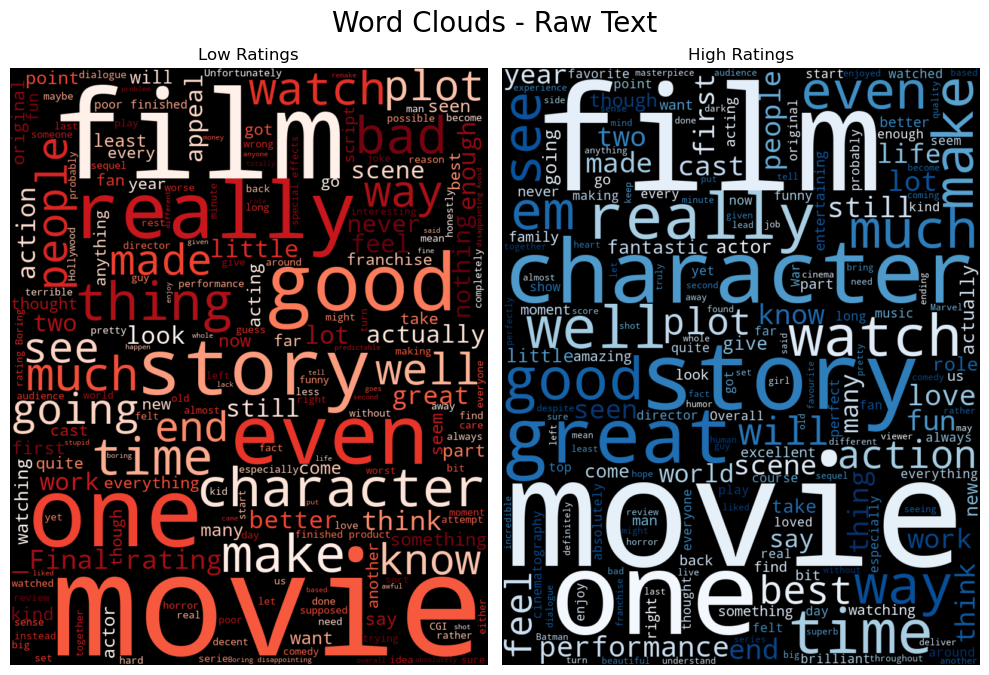

In [18]:
# Make word clouds of text
shared_kws = dict(random_state = 42,
                      width = 800,
                      height = 1000, stopwords=custom_stopwords,
                      min_word_length = 2,)
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud( colormap="Reds", **shared_kws).generate(low_reviews_raw_text)
high_cloud = WordCloud(colormap="Blues", **shared_kws,).generate(high_reviews_raw_text)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Raw Text', fontsize=20, y=1.01);
fpath_wc = FPATHS['eda']['wordclouds-raw']
fig.savefig(fpath_wc, dpi=300, bbox_inches='tight')

In [19]:
# Combining the joined-tokens for high reviews into single string from group tokens
high_reviews_lemmas_combined  =  " ".join(df.loc[filter_high, 'lemmas-joined'])
low_reviews_lemmas_combined  =  " ".join(df.loc[filter_low, 'lemmas-joined'])
high_reviews_lemmas_combined[:100]

'guilty pleasure personally love great escape work see year rightfully esteem british animation compa'

KeyError: 'eda'

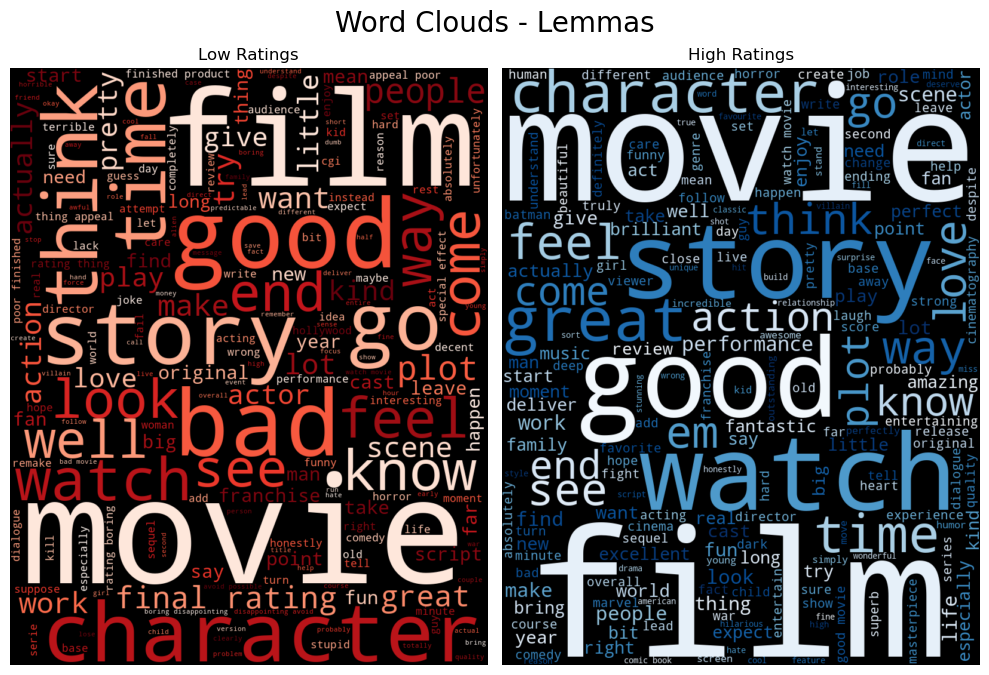

In [20]:
# Make word clouds of lemmas
shared_kws = dict(random_state = 42,
                      width = 800,
                      height = 1000, stopwords=custom_stopwords,
                      min_word_length = 2,)
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud( colormap="Reds", **shared_kws).generate(low_reviews_lemmas_combined)
high_cloud = WordCloud(colormap="Blues", **shared_kws).generate(high_reviews_lemmas_combined)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Lemmas', fontsize=20, y=1.01);
fpath_wc = FPATHS['eda']['wordclouds-lemmas']
fig.savefig(fpath_wc, dpi=300, bbox_inches='tight')

### Scattertext

In [21]:
import scattertext
from scattertext import (
    SampleCorpora,
    produce_scattertext_explorer,
    produce_scattertext_html,
)
from scattertext.CorpusFromPandas import CorpusFromPandas
# Build the scattertext corpus object
corpus = scattertext.CorpusFromPandas(
    df, category_col="rating",
    text_col='review', 
    nlp=nlp
).build().remove_terms(nlp.Defaults.stop_words, ignore_absences = True)

In [22]:
# Create html visualization
scatter_html = scattertext.produce_scattertext_explorer(
    corpus,
    category="High Rating",
    category_name="High Rating Reviews",
    not_category_name="Low Rating Reviews",
    minimum_term_frequency=3, 
    max_terms=50_000, # Added to speed up loading in streamlit
    max_docs_per_category=500, #Added to speed up loading in streamlit
    width_in_pixels=1000, # Setting a fixed width of 1000 pixels
    metadata=df["review"],
)

# Provide file path to save
scatter_fname = FPATHS["eda"]["scattertext"]
open(scatter_fname, "wb").write(scatter_html.encode("utf-8"))
print(f"Open {scatter_fname} in Chrome or Firefox.")

KeyError: 'eda'

In [24]:
# # select which version of wordclouds
# wc_choice = st.radio("Select WordCloud Text: ", ["Raw Text",'Lemmas'], index=0, horizontal=True)
# wc_choice

# if wc_choice=='Lemmas':
#     fpath_wc = FPATHS['eda']['wordclouds-lemmas']
# else:
#     fpath_wc = FPATHS['eda']['wordclouds-raw']
# fpath_wc

### Frequency of Bigrams

In [25]:
# Create filters for 1 and 5 star reviews
filter_high = df['rating'] == 'High Rating'
filter_low = df['rating'] == 'Low Rating'
# Combining the tokens for high reviews into single list of tokens
high_reviews_tokens_list = df.loc[filter_high, 'tokens'].explode().to_list()
low_reviews_tokens_list =  df.loc[filter_low, 'tokens'].explode().to_list()

In [2]:
# Making a widget for ngrams arg
ngram_type = st.radio("Type of n-gram", options= [2,3,4], index=1, horizontal=True)
ngram_type

NameError: name 'st' is not defined

In [3]:
# Making a widget for the measures arg
measure_type = st.selectbox('Measure to Compare', options=['raw_freq','pmi'], index=0)
measure_type

NameError: name 'st' is not defined

In [4]:
df_1star = get_ngram_measures_finder(low_reviews_tokens_list, ngrams=ngram_type, measure=measure_type, min_freq=min_freq, 
                                    top_n=top_n)
df_5star = get_ngram_measures_finder(high_reviews_tokens_list, ngrams=ngram_type, measure=measure_type, min_freq=min_freq, 
                                    top_n=top_n)

NameError: name 'get_ngram_measures_finder' is not defined

In [6]:
# Combine low and high reviews score dfs and add a group name as multi-index
df_compare_bigrams = pd.concat(
    [df_low_rating, df_high_rating],
    axis=1)
df_compare_bigrams

NameError: name 'df_low_rating' is not defined